<h1>Activity : UK Road Accident </h1>
<hr>
<h2>Analyst : Elysalyn Barlan</h2>

In [47]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
accidents = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h2>FILLING UP NULL VALUES</h2>

In [6]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna(accidents['Weather_Conditions'].mode()[0])

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CHANGING THE DATA TYPE</h2>

In [8]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [9]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h1> EXPLANATORY DATA ANALYSIS (EDA)</h1>
<hr>
<h2>Question 1 </h2>
<h3>What is the distribution of accident severity?</h3>

In [10]:
severity_counts = accidents['Accident_Severity'].value_counts()

In [11]:
severity_counts

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h4>Insight : The majority of recorded accidents are classified as Slight, meaning that most of them cause only minimal damage or injuries. However, the presence of Serious and Fatal cases, though fewer it's importan to take action to make roads safer.</h4>

<hr>
<h2>Question 2 </h2>
<h3>Which road type has the highest proportion of fatal accidents?</h3>

In [12]:
accidents[accidents['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()

Road_Type
Single carriageway    6560
Dual carriageway      1815
Roundabout             142
One way street          95
Slip road               49
Name: count, dtype: int64

<h4>Insights : Most fatal accidents happen on single carriageways, making up the largest propotion. This could be because they often lack barriers between lanes, so head-on collisions are more likely.</h4>

<hr>
<h2>Question 3</h2>
<h3>Do accidents involving motorcycles tend to result in more casualties than those involving cars?</h3>


In [13]:
accidents['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

In [14]:
motorcycle = accidents[accidents['Vehicle_Type'] == 'Motorcycle over 500cc']
car= accidents[accidents['Vehicle_Type'] == 'Taxi/Private hire car']

motorcycle_avg = motorcycle['Number_of_Casualties'].mean()
car_avg = car['Number_of_Casualties'].mean()

In [15]:
motorcycle_avg

np.float64(1.3594340725727871)

In [16]:
car_avg

np.float64(1.3686625545358808)

<h4>Insight : On average, accidents involving taxi/private hire cars result in slightly more casualties than those involving motorcycles, suggesting that while motorcycles are riskier for the rider, car accidents often impact more people.</h4>

<hr>
<h2>Question 4</h2>
<h3>How do light conditions influence the severity of accidents?</h3>


In [17]:
severity_by_light = (accidents.groupby(['Light_Conditions', 'Accident_Severity']).size())

severity_by_light 

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

<h4>Insights : Accident severity is often higher in darkness than in daylight, with significantly more fatal and serious wrecks happening where street lighting is absent or unlit. Emphasizing the need of appropriate lighting in lowering accident severity.</h4>

<hr>
<h2>Question 5</h2>
<h3>In the Highland district, which type of vehicle is most likely to be involved in accidents under fine no high winds conditions?</h3>


In [18]:
highland = accidents[(accidents['District Area'] == 'Highland') &(accidents['Weather_Conditions'] == 'Fine no high winds')]
vehicle_counts = highland['Vehicle_Type'].value_counts()

vehicle_counts

Vehicle_Type
Car                                      998
Van / Goods 3.5 tonnes mgw or under       92
Bus or coach (17 or more pass seats)      50
Goods 7.5 tonnes mgw and over             42
Taxi/Private hire car                     25
Motorcycle over 500cc                     24
Motorcycle 125cc and under                22
Goods over 3.5t. and under 7.5t           15
Motorcycle over 125cc and up to 500cc     15
Motorcycle 50cc and under                  9
Minibus (8 - 16 passenger seats)           8
Other vehicle                              8
Agricultural vehicle                       4
Pedal cycle                                1
Data missing or out of range               0
Ridden horse                               0
Name: count, dtype: int64

<h4>Insights : In the Highland district, under fine weather with no high winds, cars represent the predominant vehicle type involved in accidents. Accounting for the vast majority compared to all other vehicle types.</h4>

<hr>
<h2>Question 6</h2>
<h3>Is there a statistically significant difference in accident severity between urban and rural areas?</h3>

In [19]:
severity_by_area = (accidents.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size())

severity_by_area

Urban_or_Rural_Area  Accident_Severity
Rural                Fatal                  5601
                     Serious               37312
                     Slight               196077
Unallocated          Fatal                     0
                     Serious                   1
                     Slight                   10
Urban                Fatal                  3060
                     Serious               50904
                     Slight               367714
dtype: int64

<h4>Insights : Accidents in rural areas are more likely to result in fatalities compared to urban areas. While urban areas record a higher proportion of slight and serious accidents, suggesting differing risk between the two areas.</h4>

<hr>
<h2>Question 7</h2>
<h3>Which road types are associated with higher average casualties?</h3>

In [20]:
accidents.groupby('Road_Type')['Number_of_Casualties'].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.343788
Slip road             1.423661
Name: Number_of_Casualties, dtype: float64

<h4>Insights : Dual carriageways and slip roads had the greatest average casualty rates per incidents, which suggests that situations with higher speeds or merging may be more dangerous.</h4>

<hr>
<h2>Question 8</h2>
<h3>Which 5 districts report the highest average number of casualties per accident?</h3>


In [21]:
avg_casualties = accidents.groupby('District Area')['Number_of_Casualties'].mean().head(5)

avg_casualties

District Area
Aberdeen City    1.139834
Aberdeenshire    1.310363
Adur             1.319871
Allerdale        1.474291
Alnwick          1.512931
Name: Number_of_Casualties, dtype: float64

<h4>Insights : Alnwick and Allerdale district reported the highest average casualties per accident, indicating potentially more severe incidents or riskier road conditions in these areas. Compared to Aberdeen City, which has the lowest average.</h4>

<hr>
<h2>Question 9</h2>
<h3>What three districts have a higher likelihood of severe accidents involving several vehicles?</h3>

In [22]:
severe_multi = accidents[((accidents['Accident_Severity'] == 'Serious') | (accidents['Accident_Severity'] == 'Fatal')) &(accidents['Number_of_Vehicles'] > 1)]
severe_multi.head(3)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car


<h4>Insights : Kensington and Chelsea districts occur frequently in serious accidents involving numerous vehicles, indicating an increased risk of complicated crashes in this urban neighborhood. The combination of lighting conditions and wet or dry surfaces indicates environmental elements that may raise risk, especially on single-lane roads.</h4>

<hr>
<h2>Question 10</h2>
<h3>Are Rural districts more prone to severe accidents than Urban ones?</h3>

In [23]:
accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h4>Insights : Urban areas report a higher number of total accidents, likely due to greater traffic density and population. However, Rural districts may still be more prone to severe accidents, as factors like higher driving speeds,</h4>

<hr>
<h2>Question 11</h2>
<h3>Which vehicle types are most frequently involved in accidents in Adur district?</h3>

In [24]:
adur_accidents = accidents[accidents['District Area'] == 'Adur']
vehicle_counts = adur_accidents['Vehicle_Type'].value_counts()

vehicle_counts

Vehicle_Type
Car                                      480
Bus or coach (17 or more pass seats)      29
Van / Goods 3.5 tonnes mgw or under       27
Motorcycle over 500cc                     21
Motorcycle 125cc and under                14
Goods 7.5 tonnes mgw and over             13
Motorcycle over 125cc and up to 500cc      9
Taxi/Private hire car                      8
Motorcycle 50cc and under                  7
Goods over 3.5t. and under 7.5t            4
Agricultural vehicle                       3
Other vehicle                              3
Minibus (8 - 16 passenger seats)           1
Data missing or out of range               0
Ridden horse                               0
Pedal cycle                                0
Name: count, dtype: int64

<h4>Insights : Cars dominate accident involvement in Adur, accounting for the vast majority of incidents. Motorcycles and commercial vehicles follow at much lower frequencies, highlighting cars as the primary focus for local road safety efforts.</h4>

<hr>
<h2>Question 12</h2>
<h3>Which vehicle types are most frequently involved in accidents during adverse weather?</h3>

In [25]:
snowing = accidents[accidents['Weather_Conditions'] == 'Snowing no high winds']
vehicle_counts = snowing['Vehicle_Type'].value_counts()
vehicle_counts

Vehicle_Type
Car                                      4748
Van / Goods 3.5 tonnes mgw or under       296
Motorcycle over 500cc                     254
Bus or coach (17 or more pass seats)      219
Goods 7.5 tonnes mgw and over             149
Motorcycle 125cc and under                146
Taxi/Private hire car                     136
Motorcycle 50cc and under                  75
Motorcycle over 125cc and up to 500cc      72
Goods over 3.5t. and under 7.5t            52
Other vehicle                              50
Agricultural vehicle                       22
Minibus (8 - 16 passenger seats)           16
Pedal cycle                                 3
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

<h4>Insights : Cars are by far the most often involved vehicle type in accidents during inclement weather, demonstrating their dominance on the road. Motorcycles and light cargo vehicles are also heavily involved.</h4>

<hr>
<h2>Question 13</h2>
<h3>Which district has the highest number of casualties?</h3>

In [26]:
casualty_totals = accidents.groupby('District Area')['Number_of_Casualties'].sum().head(1)

casualty_totals

District Area
Aberdeen City    1508
Name: Number_of_Casualties, dtype: int64

<h4>Insights : Aberdeen City records the highest number of 1508 casualties, indicating a concentration of traffic incidents in the area.</h4>

<hr>
<h2>Question 14</h2>
<h3>Are certain vehicle types more prone to accidents in rural areas compared to urban zones?</h3>

In [27]:
rural = accidents[accidents['Urban_or_Rural_Area'] == 'Rural']
rural_counts = rural['Vehicle_Type'].value_counts()
rural_counts.head()

Vehicle_Type
Car                                     181922
Van / Goods 3.5 tonnes mgw or under      12156
Bus or coach (17 or more pass seats)      9025
Motorcycle over 500cc                     8957
Goods 7.5 tonnes mgw and over             6156
Name: count, dtype: int64

In [28]:
urban = accidents[accidents['Urban_or_Rural_Area'] == 'Urban']
urban_counts = urban['Vehicle_Type'].value_counts()
urban_counts.head()

Vehicle_Type
Car                                     316062
Van / Goods 3.5 tonnes mgw or under      22003
Bus or coach (17 or more pass seats)     16851
Motorcycle over 500cc                    16700
Goods 7.5 tonnes mgw and over            11151
Name: count, dtype: int64

<h4>Insights : Cars are the most accident-prone vehicle type in both rural and urban zones, reflecting their dominance on the roads. However, motorcycles and heavy goods vehicles show relatively higher proportions in rural accidents.</h4>

<hr>
<h2>Question 15</h2>
<h3>Which districts report the highest casualty rates in rural areas?</h3>

In [29]:
rural_casualty = accidents[accidents['Urban_or_Rural_Area'] == 'Rural']
casualties_by_district = rural_casualty.groupby('District Area')['Number_of_Casualties'].sum().head(1)

casualties_by_district

District Area
Aberdeen City    247
Name: Number_of_Casualties, dtype: int64

<h4>Insights : Aberdeen City reports the highest casualty count in rural areas, highlighting a notable concentration of incidents outside urban zones.</h4>

<hr>
<h2>Question 16</h2>
<h3>What is the distribution of casualty counts across different vehicle types and area types?</h3>

In [30]:
casualty_distribution = accidents.groupby(['Urban_or_Rural_Area', 'Vehicle_Type'])['Number_of_Casualties'].sum()
casualty_distribution

Urban_or_Rural_Area  Vehicle_Type                         
Rural                Agricultural vehicle                        973
                     Bus or coach (17 or more pass seats)      13338
                     Car                                      269416
                     Data missing or out of range                  0
                     Goods 7.5 tonnes mgw and over              8974
                     Goods over 3.5t. and under 7.5t            3349
                     Minibus (8 - 16 passenger seats)           1031
                     Motorcycle 125cc and under                 7379
                     Motorcycle 50cc and under                  3944
                     Motorcycle over 125cc and up to 500cc      3887
                     Motorcycle over 500cc                     13228
                     Other vehicle                              2856
                     Pedal cycle                                 106
                     Ridden horse           

<h4>Insights : As we can see the distribution of casualty counts Cars cause the most casualties in both urban and rural locations. Motorcycles and vans are heavily involved in both zones, with agricultural and heavy cargo vehicles causing the most casualties in rural areas.</h4>

<hr>
<h2>Question 17</h2>
<h3>What is the average number of casualties for dry road surface condition?</h3>

In [31]:
dry_avg = accidents[accidents['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties'].mean()

dry_avg 

np.float64(1.3345446519539759)

<h4>Insights : Dry road conditions average about 1.33 casualties per accident. This suggests that even in ideal surface conditions, accidents can still result in multiple injuries.</h4>

<hr>
<h2>Question 18</h2>
<h3>Which is the highest number of casualties in road surface condition?</h3>

In [32]:
min_casualties = accidents.groupby('Road_Surface_Conditions')['Number_of_Casualties'].max()

min_casualties

Road_Surface_Conditions
Dry                     45
Flood over 3cm. deep     9
Frost or ice            48
Snow                    18
Wet or damp             68
Name: Number_of_Casualties, dtype: int64

<h4>Insights : Wet or damp roads lead to the highest number of casualties among all surface conditions. This highlights how reduced traction and visibility can significantly increase accident severity.</h4>

<hr>
<h2>Question 19</h2>
<h3>What is the average number of casualties for each type of weather condition?</h3>

In [33]:
average_casualties = accidents.groupby('Weather_Conditions')['Number_of_Casualties'].mean()

average_casualties

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.347397
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64

<h4>Insights : Fog or mist leads to the highest average casualties per accident, suggesting visibility plays a major role in severity.</h4>

<hr>
<h2>Question 20</h2>
<h3>What weather condition has the most accidents?</h3>

In [34]:
most_accidents = accidents['Weather_Conditions'].value_counts()

most_accidents

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h4>Insights : Most accidents occur during fine weather with no high winds, likely due to higher traffic volumes and driver complacency. Rainy conditions follow, showing that wet roads still pose significant risk despite lower traffic.</h4>

<h1>Clearing any Inconsistencies with Data Set </h1>

In [35]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [36]:
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting date information using pandas date time</h1>

In [67]:
# accidents['Accident Date'] = accidents['Accident Date'].str.strip()
accidents['Accident Date'] = accidents['Accident Date'].astype('str')
accidents['Accident Date'] = accidents['Accident Date'].str.replace('/','-')

In [38]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [39]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek

<hr>
<h2>Question 21</h2>
<h3>Are serious/fatal accidents becoming more or less frequent over the years?</h3>

In [40]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'])
accidents['Year'] = accidents['Accident Date'].dt.year
severe = accidents[(accidents['Accident_Severity'] == 'Serious') | (accidents['Accident_Severity'] == 'Fatal')]
yearly_severe = severe['Year'].value_counts()

yearly_severe

Year
2019.0    10939
2020.0    10288
2021.0     9681
2022.0     7889
Name: count, dtype: int64

<h4>Insights : Serious and fatal accidents have decreased steadily from 2019 to 2022, reflecting a clear downward trend in their occurrence over this period.</h4>

<hr>
<h2>Question 22</h2>
<h3>How has the average number of casualties per accident changed over the years?</h3>

In [41]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'])
accidents['Year'] = accidents['Accident Date'].dt.year
yearly_avg_casualties = (accidents.groupby('Year')['Number_of_Casualties'].mean())

yearly_avg_casualties     

Year
2019.0    1.358092
2020.0    1.349002
2021.0    1.351115
2022.0    1.349934
Name: Number_of_Casualties, dtype: float64

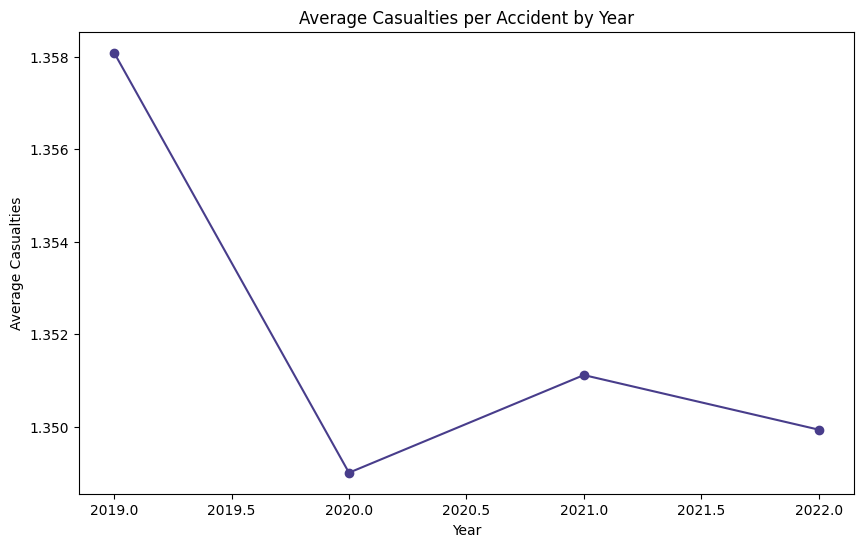

In [65]:
accidents['Year'] = pd.to_datetime(accidents['Accident Date']).dt.year

accidents.groupby('Year')['Number_of_Casualties'].mean().plot( kind='line', marker='o',color = 'darkslateblue', figsize=(6,4))
plt.title('Average Casualties per Accident by Year')
plt.ylabel('Average Casualties')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h4>Insights : From 2019 to 2022, the average number of casualties per accident fluctuated little, remaining close to 1.35. Indicating that while the total number of accidents may vary, the casualty rate per incident has remained stable. </h4>

<hr>
<h2>Question 23</h2>
<h3>How many casualties occurred each year?</h3>

In [42]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'])
casualties_per_year = accidents.groupby('Year')['Number_of_Casualties'].sum()

casualties_per_year

Year
2019.0    97602
2020.0    94650
2021.0    89406
2022.0    76683
Name: Number_of_Casualties, dtype: int64

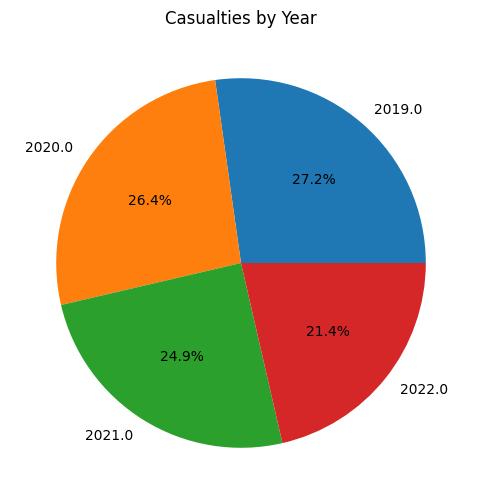

In [62]:
accidents['Year'] = pd.to_datetime(accidents['Accident Date']).dt.year
accidents.groupby('Year')['Number_of_Casualties'].sum().plot( kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Casualties by Year')
plt.ylabel('')
plt.show()

<h4>Insights : Casualties steadily declined from 97,602 in 2019 to 76,683 in 2022, marking a 21% drop over four years. The sharpest decrease occurred in 2022, suggesting a possible shift in safety measures or travel behavior.</h4>

<hr>
<h2>Question 24</h2>
<h3>Which vehicle type is associated with the highest number of casualties?</h3>

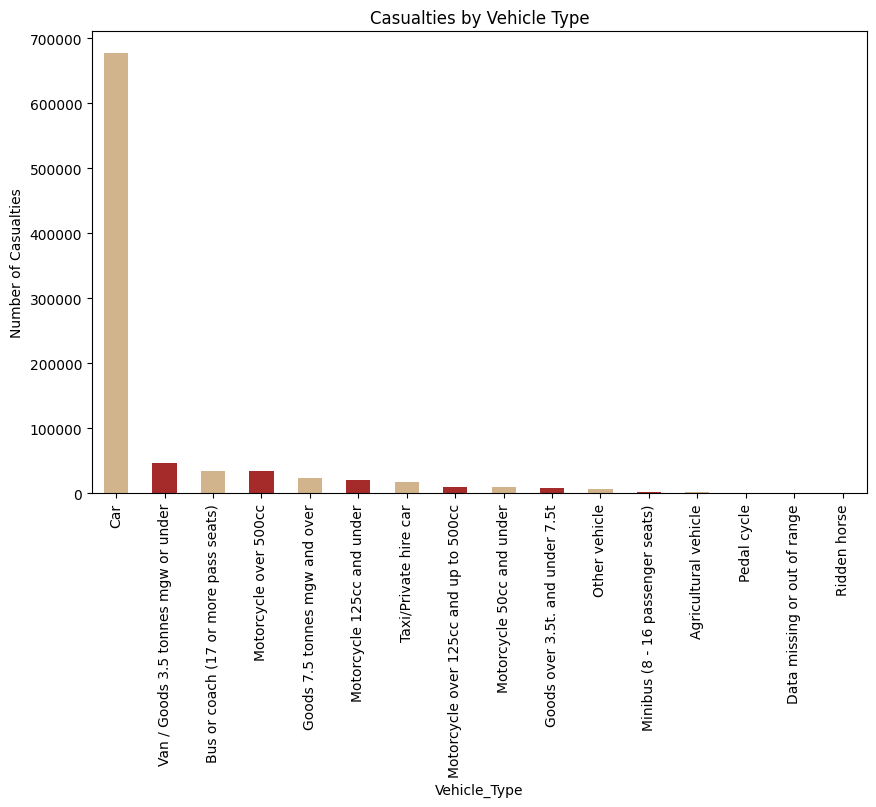

In [60]:
casualties = accidents.groupby('Vehicle_Type')['Number_of_Casualties'].sum()

casualties.sort_values(ascending=False).plot(kind='bar', color=['tan', 'brown'])
plt.title('Casualties by Vehicle Type')
plt.ylabel('Number of Casualties')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h4>Insights : Cars are linked to the highest number of casualties by far, with over 676,000 incidents more than 10 times that of the next highest category. Vans and buses follow. But motorcycles over 500cc also show a surprisingly high casualty count, highlighting their risk despite lower usage.</h4>

<hr>
<h2>Question 25</h2>
<h3>Which road types are associated with the highest number of accidents?</h3>

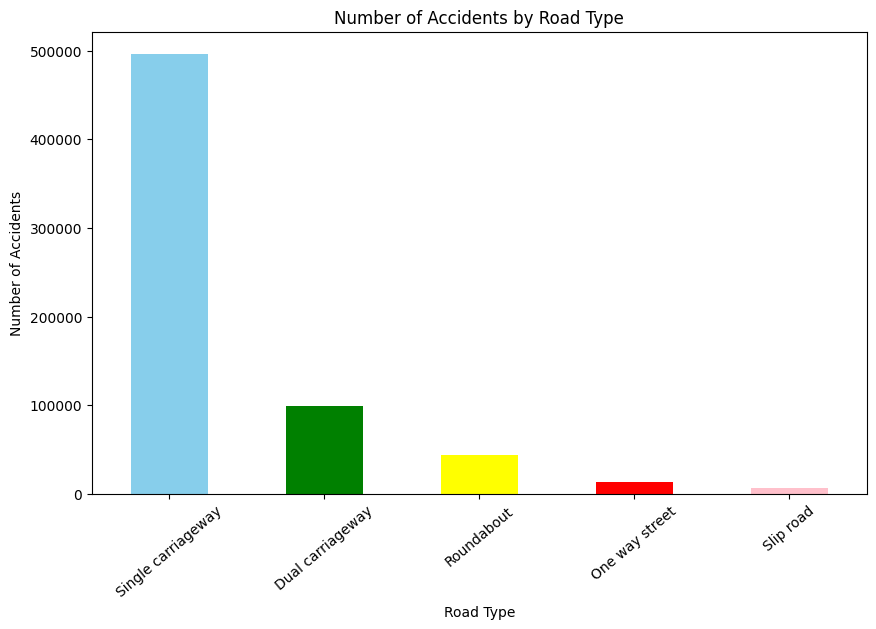

In [59]:
road_counts = accidents['Road_Type'].value_counts()
road_counts.plot(kind='bar', color=['skyblue', 'green', 'yellow', 'red', 'pink'])
plt.title('Number of Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)
plt.gcf().set_size_inches(10, 6)

<h4>Insights : Single carriageways account for the vast majority of accidents, with nearly 500,000 incidents—five times more than dual carriageways. Roundabouts and one-way streets show significantly fewer accidents, suggesting lower traffic volume or reduced speed zones.</h4>